In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
data = load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(data['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
train_df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [6]:
train_df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [7]:
train_df['target'] = data['target']

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Оцените среднее значение объектов для каждого признака группирую их по целевой переменной

In [10]:
#ваш код
train_df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Разделите выборку на train и test, не забутьде зафиксировать random_state

In [11]:
#ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.3, random_state=123)

Обучите DecisionTreeClassifier на тренировочной выборке

In [12]:
#ваш код
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [13]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Сделайте прогноз на основе тестовой выборки. Для вывода таких метрик как precision, recall, f1-score используется функция classification_report. Выведите результат ее работы на прогнозе

In [14]:
from sklearn.metrics import classification_report

In [15]:
#ваш код
print(classification_report(y_test, dtc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        68
          1       0.97      0.97      0.97       103

avg / total       0.96      0.96      0.96       171



Оцените ваше данные на основе выводов, которые можно сделать исходя из средних значений каждого признака. Постройте график по двум признакам 

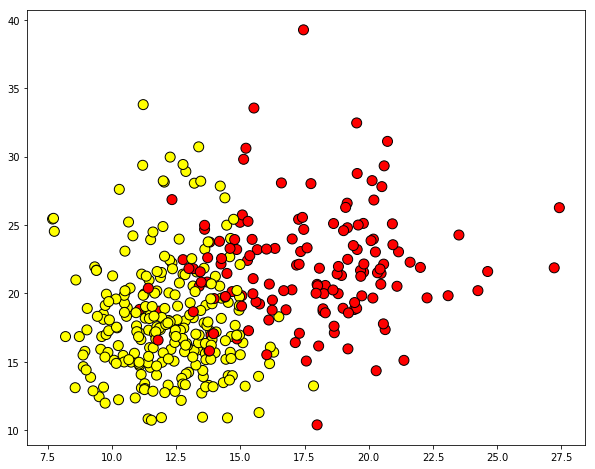

In [16]:
#ваш код
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, 
cmap='autumn', edgecolors='black');
#plt.plot(range(-2,5), range(4,-3,-1));

Отрисуйте полученное дерево

In [17]:
#ваш код
from sklearn.tree import export_graphviz
names = []
for i in range(1, 31):
    names.append('x'+str(i))
export_graphviz(dtc, feature_names=names, out_file='small_tree.dot', filled=True)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

"dot" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Ниже представлены параметры по которым можно осуществить поиск лучших параметров для модели Дерева. Осуществите GridSearch по ним.

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
params = {'criterion':['gini','entropy'],'max_depth':[5, 10, 20], 'min_samples_leaf': [5, 10, 20, 25]}

In [20]:
#ваш код
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, n_jobs=-1)

In [21]:
%%time
grid.fit(X_train, y_train)

Wall time: 1.92 s


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20], 'min_samples_leaf': [5, 10, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
grid.best_score_

0.9447236180904522

In [23]:
grid.score(X_test, y_test)

0.9473684210526315

In [24]:
print(classification_report(y_test, grid.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.90      0.93        68
          1       0.94      0.98      0.96       103

avg / total       0.95      0.95      0.95       171



Выбрав лучший классификатор, сделайте прогноз и выведите classification_report

In [25]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [26]:
#ваш код
extra = ExtraTreesClassifier()
extra.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
print(classification_report(y_test, extra.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97        68
          1       0.97      0.99      0.98       103

avg / total       0.98      0.98      0.98       171

